# 2. devCellPy Train

## Train Options

trainAll is a devCellPy option that allows the user to train the devCellPy algorithm on cell types in their single cell RNA training dataset for use in prediction of their query dataset later. The training of each layer of cell types influences the next. There are two possible options for training, one with metrics of the model outputted (recommended), and one without. The required parameters and sample code required to run each are listed below. Here we illustrate how train devCellPy using data from peripheral blood mononuclear cells derived from Zheng etal. Nature Communications, 2017. 

trainAll: Training all layers WITH cross validation and metrics
* (runMode = trainAll, trainNormExpr, labelInfo, trainMetadata, testSplit, rejectionCutoff)
* Example: `devcellpy --runMode trainAll --trainNormExpr /devcellpy_example/zheng_pbmc_10K.csv --labelInfo /devcellpy_example/zheng_labelinfo.csv --trainMetadata /devcellpy_example/zheng_pbmc_10K_metadata.csv --testSplit 0.1 --rejectionCutoff 0.5`

trainAll: Training all layers WITHOUT cross validation and metrics
* (runMode = trainAll, trainNormExpr, labelInfo, trainMetadata, rejectionCutoff)
* Example: `devcellpy --runMode trainAll --trainNormExpr /devcellpy_example/zheng_pbmc_10K.csv --labelInfo /devcellpy_example/zheng_labelinfo.csv --trainMetadata /devcellpy_example/zheng_pbmc_10K_metadata.csv --rejectionCutoff 0.5`

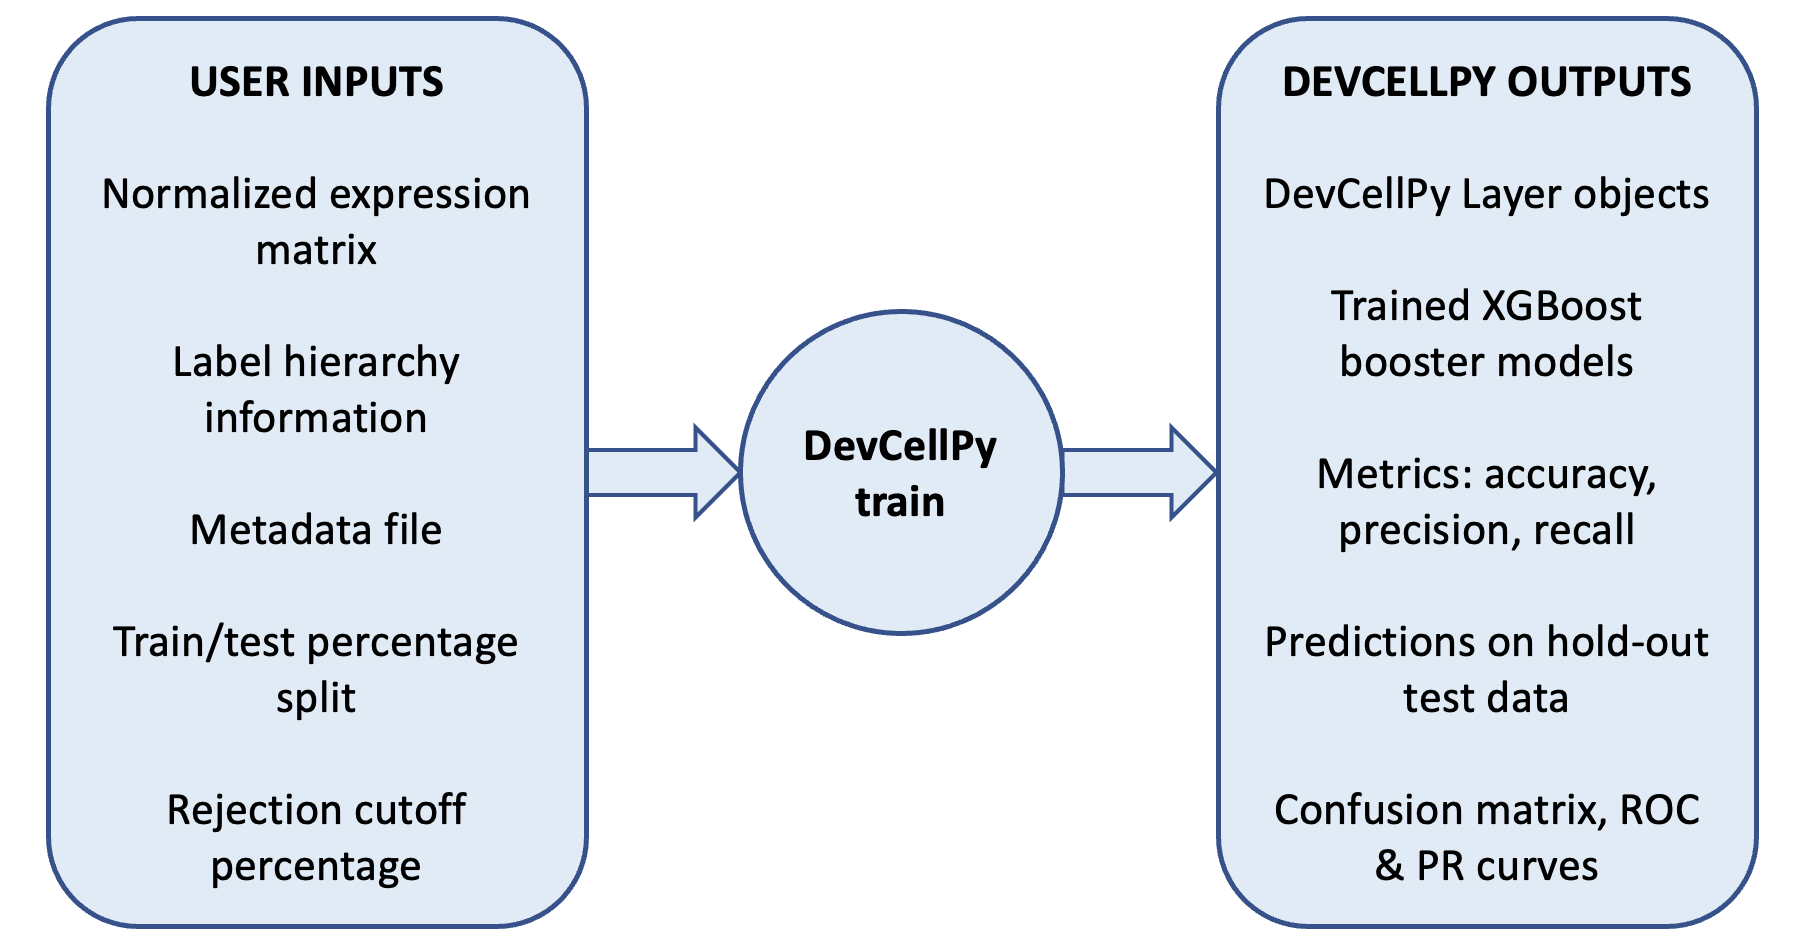

## REQUIRED USER INPUTS:

-  **trainNormExpr**: normalized expression matrix csv file
-  **labelInfo**: label information csv file
-  **trainMetadata**: metadata csv file
-  **testSplit (optional but recommended)**: float between 0 and 1 denoting the amount of data to holdout for evaluating the model
-  **rejectionCutoff**: float between 0 and 1 denoting the minimum probability for a prediction to not be rejected

### trainNormExpr

##### FORMAT: csv file

* contains normalized expression of genes for each single cell 
* first column: gene names
* row headers: cell barcodes
* row 1 column 1 is 'gene'

##### EXAMPLE 1:

`gene,AAACCCAG........,AAACGAAC........,AAACGAAT........,GAGGGATC........
MIR1302-10,0,2.14693417019908,2.31409562022533,0
OR4F29,0,1.71783906814673,0,0
LINC00115,0,0,0,2.8499342352407
ISG15,2.99811039595896,0,2.41534932603235,0`

##### EXAMPLE 2:

In [5]:
import pandas as pd

#example train_normexpr from Zheng 68K dataset
normexpr = pd.read_csv("/Users/vivian/Downloads/normalized_expression.csv", usecols = [0,1,2,3,4], nrows = 20)
normexpr

,gene,AAACATACCGGAGA-1,AAACATACTCTTCA-1,AAACATACTGGATC-1,AAACATACTGTCTT-1
0,MIR1302-10,0,0,0,0
1,FAM138A,0,0,0,0
2,OR4F5,0,0,0,0
3,RP11-34P13.7,0,0,0,0
4,RP11-34P13.8,0,0,0,0
5,AL627309.1,0,0,0,0
6,RP11-34P13.14,0,0,0,0
7,RP11-34P13.9,0,0,0,0
8,AP006222.2,0,0,0,0
9,RP4-669L17.10,0,0,0,0


### labelInfo

##### FORMAT: csv or txt file

-  explains how each celltype is separated into different layers
-  each column represents a single layer, in the following column the subtypes of that celltype are indicated with the first subtype lying in the same row and all other subtypes filling in the following rows
-  if there are no subtypes for that particular celltype, leave cell in csv empty
-  each column contains the labels at each layers
-  gaps should be left in higher-level layers to denote branching from a given label
* *NOTE: all labels should be unique and should not contain commas*

The labelInfo file is crucial for informing the algorithm the structure of the different layers of cell labels

##### EXAMPLE 1:

`B-cell,,,,,,,
Basophil,,,,,,,
Dendritic,,,,,,,
Macrophage,,,,,,,
Monocyte,,,,,,,
NK,,,,,,,
Platelet,,,,,,,
T-cell,CD4,Effector Memory CD4,,,,,
,,Naive/Central CD4,,,,,
,,T-reg CD4,,,,,
,CD8,Effector Memory CD8,,,,,
,,Naive CD8,,,,,
,,Temra CD8,,,,,`

In [7]:
#example 1
import pandas as pd
labels = pd.read_csv("~/StanfordCVI/DevCellPy/Tutorial/tutorial_example_files/zheng_labelinfo.txt", header=None, usecols = [0,1,2])
labels

,0,1,2
0,B-cell,NaN,NaN
1,Dendritic,NaN,NaN
2,Macrophage,NaN,NaN
3,Monocyte,NaN,NaN
4,NK,NaN,NaN
5,Platelet,NaN,NaN
6,T-cell,CD4,Effector Memory CD4
7,NaN,NaN,Naive/Central CD4
8,NaN,NaN,T-reg CD4
9,NaN,CD8,Effector Memory CD8


-  layer 1 contains 8 different cell-types: B-cell, Basophil, Dendritic, Macrophage, Monocyte, NK, Platelet, T-cell
-  T-cells are further classified into CD4 and CD8 cells in layer 2
-  CD4 cells are further classified into Effector Memory CD4, Naive/Central CD4, T-reg CD4 in layer 3
-  CD8 cells are further classified into Effector Memory CD8, Naive CD8, Temra CD8 in layer 3
-  *Note: Effector Memory CD4 and Temra CD8 are both layer 3 labels despite having different layer 2 labels*
-  *Note: gaps are left between CD4 and CD8 to make clear to the devCellPy algorithm that Naive/Central CD4 and T-reg CD4 belong under the CD4 layer*

##### EXAMPLE 2 (generic labels):

`Z,,,
A,A1,A1A,
,,A1B,
,A2,A2A,
,,A2B,A2B1
,,,A2B2
,A3,,
,A4,A4A,
,,A4B,
,,A4C,
,A5,,
Y,,,
B,B1,,
,B2,B2A,
,,B2B,
,,B2C,
,,B2D,
,B3,,
,B4,,
C,C1,,
,C2,,
D,,,
E,,,`

In [9]:
#example 2
labels2 = pd.read_csv("/Users/vivian/Desktop/example2labels.csv", header=None)
labels2

,0,1,2,3
0,Z,NaN,NaN,NaN
1,A,A1,A1A,NaN
2,NaN,NaN,A1B,NaN
3,NaN,A2,A2A,NaN
4,NaN,NaN,A2B,A2B1
5,NaN,NaN,NaN,A2B2
6,NaN,A3,NaN,NaN
7,NaN,A4,A4A,NaN
8,NaN,NaN,A4B,NaN
9,NaN,NaN,A4C,NaN


-  layer 1 contains 6 different labels: Z, A, B, C, D, E
-  A cells are further classified into A1, A2, A3, A4, A5 in layer 2
-  B cells are further classified into B1, B2, B3, B4 in layer 2
-  C cells are further classified into C1, C2 in layer 2
-  A1 cells are further classified into A1A, A1B in layer 3
-  A2 cells are further classified into A2A, A2B in layer 3
-  A4 cells are further classified into A4A, A4B, A4C in layer 3
-  B2 cells are further classified into B2A, B2B, B2C, B2D in layer 3
-  A2B cells are further classified into A2B1, A2B2 cells in layer 4

### trainMetadata

##### FORMAT: csv file

-  row 1, column 1 should be `NA`, ie. empty when opened in Excel
-  first column contains cell names, should be in the same order as first row of trainNormExpr
-  each column following contains the layered identification for each cell
-  all other cells should be NA or empty
* a single row contains a cell barcode and then the cell label corresponding to each subtype category
*  all other cells should be `NA`, ie. empty when opened in Excel

##### EXAMPLE:

`,Celltype1,Celltype2,Celltype3
AAACCCAG........,Monocyte,NA,NA
AAACGAAC........,NK,NA,NA
AAACGAAT........,Macrophage,NA,NA
GAGGGATC........,T-cell,"CD8,"Effector Memory CD8`

In [10]:
#example train_metadata
import pandas as pd
labels = pd.read_csv("/Users/vivian/Downloads/zheng_metadata.csv", nrows=10)
labels

,Unnamed: 0,celltype,cd4cd8,tcell.type
0,AAACATACCGGAGA-1,T-cell,CD4,Effector Memory CD4
1,AAACATACTCTTCA-1,T-cell,CD4,Naive/Central CD4
2,AAACATACTGGATC-1,T-cell,CD4,Naive/Central CD4
3,AAACATACTGTCTT-1,T-cell,CD4,Effector Memory CD4
4,AAACATTGGGGTGA-1,T-cell,CD4,Effector Memory CD4
5,AAACATTGGTTCAG-1,T-cell,CD4,Naive/Central CD4
6,AAACATTGTCTTCA-1,T-cell,CD4,T-reg CD4
7,AAACCGTGTACAGC-1,T-cell,CD4,Effector Memory CD4
8,AAACCGTGTCGCTC-1,T-cell,CD4,Naive/Central CD4
9,AAACCGTGTTTCAC-1,T-cell,CD4,Naive/Central CD4


### testSplit (Optional but Recommended)

##### FORMAT: float between 0 and 1

-  a testsplit value of 0.1 means 10% of the data will be held out for testing the model
-  the holdout dataset is stratified and preserves the proportions of the cell labels in the original dataset

If not provided by the user, training will proceed without cross-validation and model evaluation

### rejectionCutoff

##### FORMAT: float between 0 and 1

-  a rejection cutoff of 0.5 means a cell will be regarded as "Unclassified" if no class has a predicted probability greater than 50%
- the rejection cutoff is relevant for generating metrics of trained model behavior from where test split divides the data into a training portion and a test portion 
    * different rejection cutoff does not impact prediction results when generated .pkl object is later used in the predictOne or predictAll option

## OUTPUTS OF TRAINONLY:

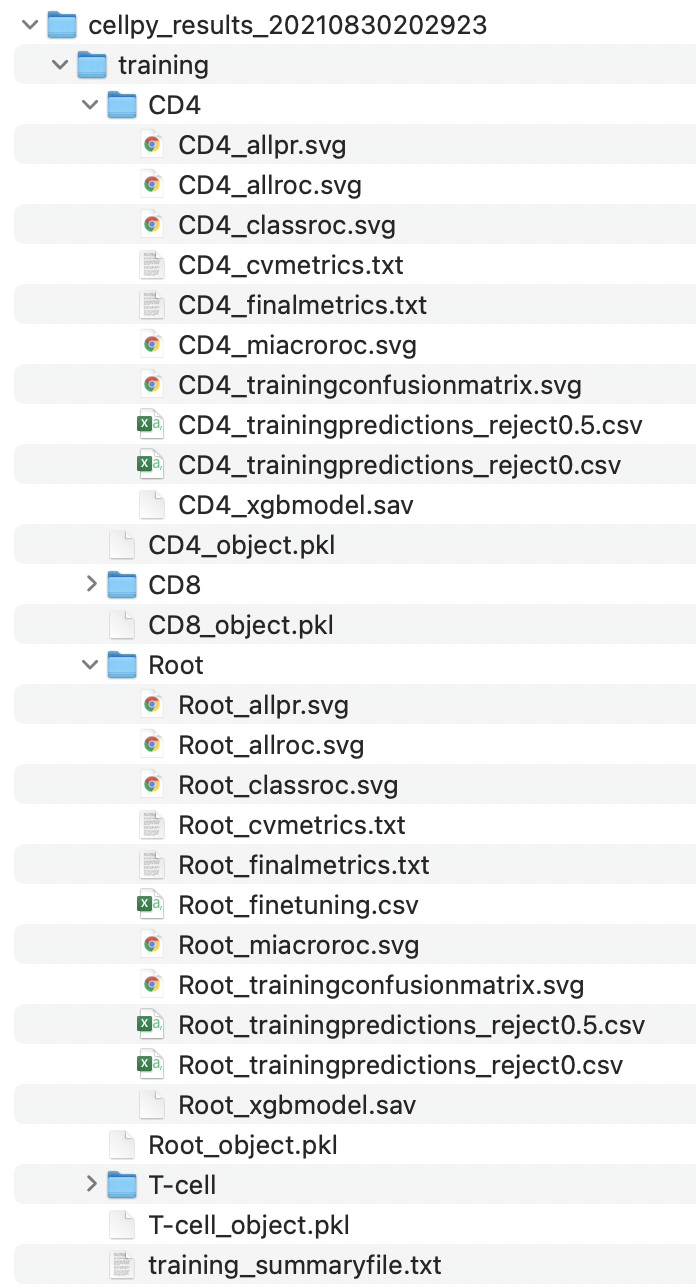

* creates directory "training" in a folder named "devcellpy_results_(time)"
* within "training" there will be a separate folder for each Layer, with 'Root' being the first Layer
* each Layer folder contains the following:
    * Pickled Object (layername.pkl) representing the trained Layer
    * XGB Model (layername_xgbmodel.sav) containing the trained XGBoost Booster object
    * 10-Fold Cross-Validation Metrics (layername_cvmetrics.txt) showing precision, recall, and accuracy scores for each class and overall for each of the 10 iterations on the training portion of the provided dataset
    * Final Metrics (layername_finalmetrics.txt) showing precision, recall, and accuracy scores for each class and overall for the holdout test portion of the provided dataset
    * Predictions w/o Rejection (layername_trainingpredictions_reject0.csv) listing the model's raw predictions for all cells in the holdout test portion of the provided dataset, including each cell's true label from the metadata, the predicted label, and the predicted probability of it belonging in each class
    * Predictions w/ Rejection (layername_trainingpredictions_rejectprovidedcutoff.csv) listing the model's filtered predictions for all cells in the holdout test portion of the provided dataset, cells whose maximum predicted probability falls under the provided cutoff are marked as "Unclassified"
    * Confusion Matrix w/ Rejection (layername_confusionmatrix.svg) illustrating the confusion matrix for the model's filtered predictions for all cells in the holdout test portion of the provided dataset, unclassified cells are excluded from the confusion matrix
    * Micro/Macro ROC Curves (layername_miacroroc.svg) graphing the receiver operating characteristic curves of the model for the micro and macro averages
    * Per-Class ROC Curves (layername_classroc.svg) graphing the receiver operating characteristic curves of the model for each class
    * All Combined ROC Curves (layername_allroc.svg) graphing the receiver operating characteristic curves of the model for the micro and macro averages and each class
    * Precision-Recall Curves (layername_allpr.svg) graphing the PR curves of the model for the micro average and each class
* the root layer will also contain a finetuning log (Root_finetuning.csv) that lists all 50 test iterations with randomized variables and their respective per-class accuracies and overall mean absolute error
* running trainAll without a testSplit value will result in the generation of only the first two files (layername.pkl and layername_xgbmodel.sav)

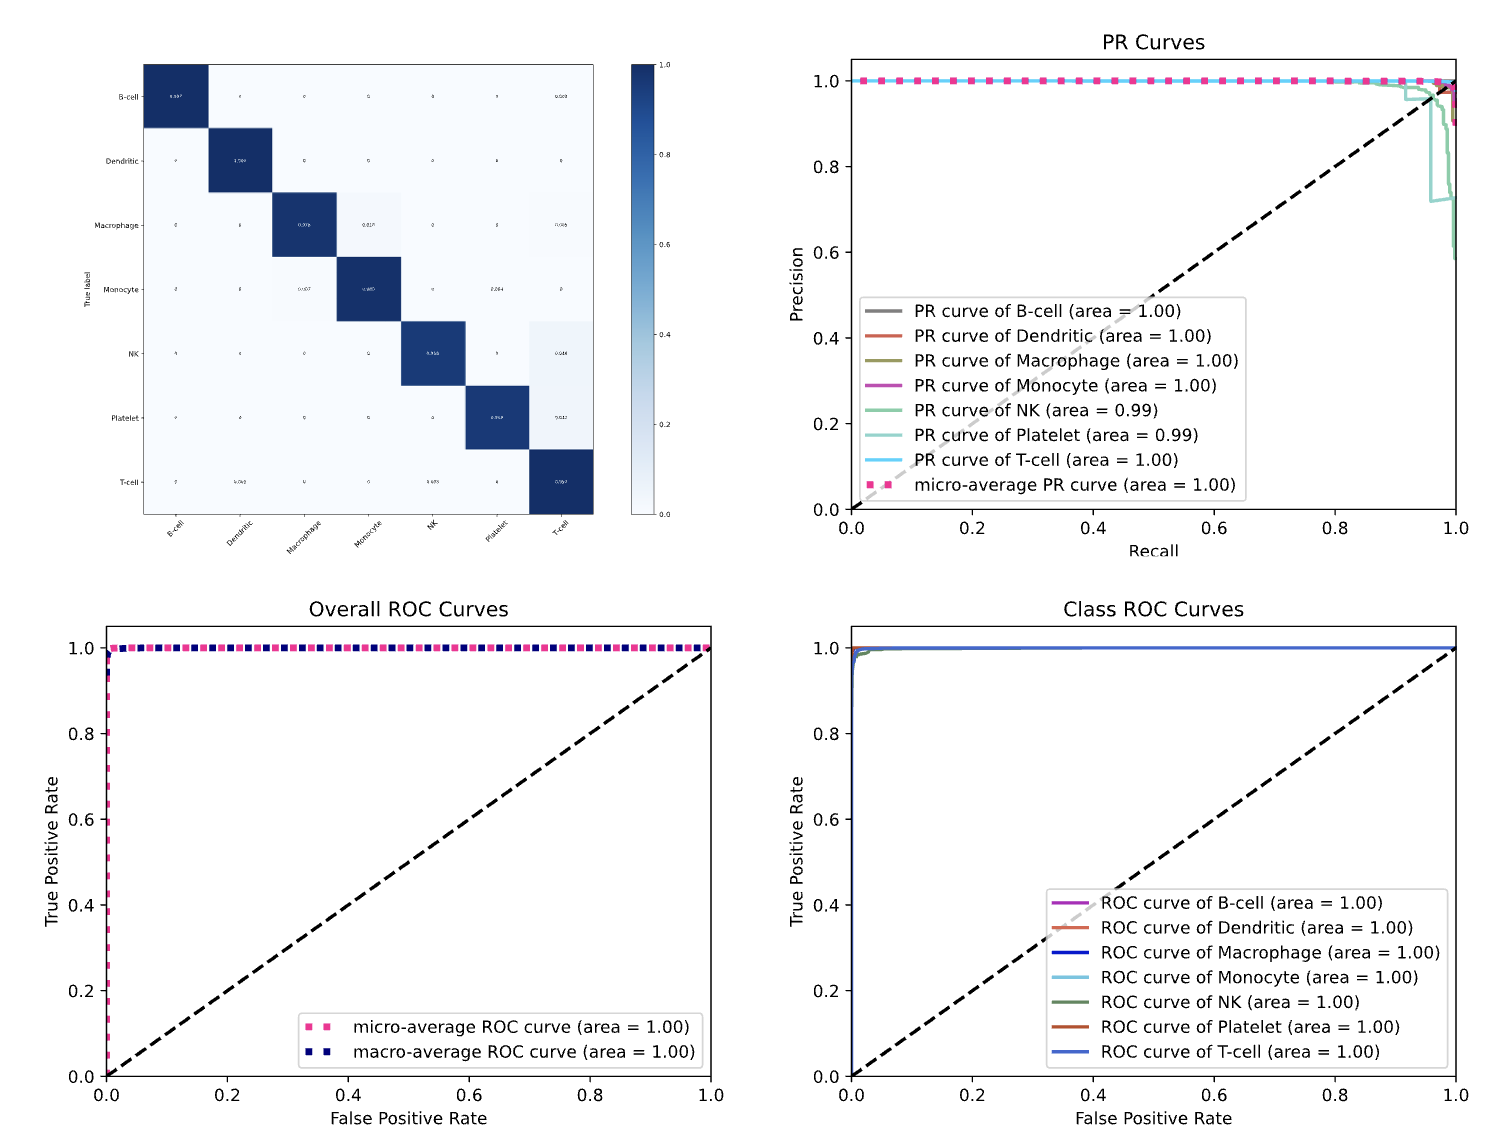

# Back to Table of Contents

[Table of Contents](https://github.com/devCellPy-Team/devCellPy/blob/main/Tutorial/0.tableofcontents.ipynb)